In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Intrinsic NumPy Array Creation
NumPy has built-in functions for creating arrays from scratch:
zeros(shape) will create an array filled with 0 values with the specified shape. The default dtype is float64.

In [2]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

arange() will create arrays with regularly incrementing values. A data type can be added to ensure the type needed.

In [3]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
np.arange(2, 10, dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

Using a third parameter we can set the numbers in the array to a certain number of decimal places.

In [5]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

reshape() will create a 2D array with the number of rows and columns specified but the number in the arrange() function must be a common multiple of the two numbers

In [6]:
np.arange(15).reshape(3, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

indices() will create a set of arrays (stacked as a one-higher dimensioned array), one per dimension with each representing variation in that dimension.

In [7]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

# Distributions
### numpy.random.uniform(low=0.0, high=1.0, size=None)
The first parameter in the function represents the lower boundry of the array, the second parameter represents the the upper boundry of the array and the third is the size of the array. The array may contain the exact value of the lower boundry but not the upper.

The main difference between the random and random.uniform functions is that the rand() will only give numbers between 0 and 1 while random.uniform() will give numbers in any interval.
The function will output drawn samples of a parameterized uniform distribution.

(array([ 991.,  960., 1072., 1010., 1046.,  992.,  988.,  962.,  998.,
         981.]),
 array([6.03444807e-04, 1.00047975e+00, 2.00035605e+00, 3.00023235e+00,
        4.00010865e+00, 4.99998495e+00, 5.99986125e+00, 6.99973755e+00,
        7.99961385e+00, 8.99949015e+00, 9.99936645e+00]),
 <a list of 10 Patch objects>)

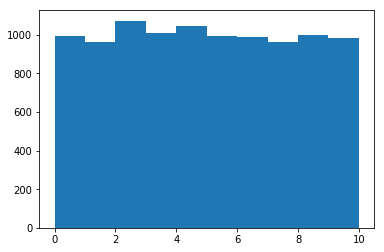

In [8]:
x = np.random.uniform(0.0,10.0, 10000)
plt.hist(x)

### numpy.random.normal(loc=0.0, scale=1.0, size=None)
Normal distributions centre around the loc parameter which is the mean or "centre" of the distribution while the scale is the standard deviation or "width" of the distribution and the size represents the size of the data.

Looking at the distribution graphed we can see that it represents a bell curves and the brunt of the data lays around the the first parameter given with the values decreasing as we go outwards from that point.

(array([  25.,  213.,  910., 2142., 2980., 2411., 1024.,  253.,   36.,
           6.]),
 array([1.44787355, 2.22341421, 2.99895488, 3.77449554, 4.5500362 ,
        5.32557686, 6.10111752, 6.87665818, 7.65219884, 8.42773951,
        9.20328017]),
 <a list of 10 Patch objects>)

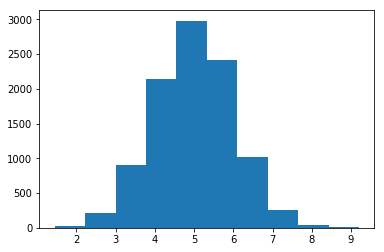

In [9]:
x = np.random.normal(5.0, 1.0, 10000)
plt.hist(x)

### numpy.random.triangular(left, mode, right, size=None)
The triangular distribution is continous distribution with a lower limit being left, a peak at mode, a upper limit at right and the size of the data. Unlike other distributions, the parameters directly define the shape of the output. 



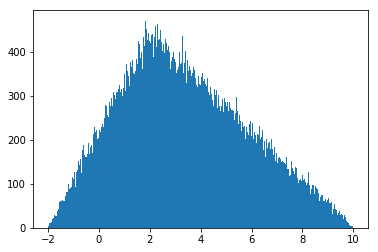

In [10]:
h = plt.hist(np.random.triangular(-2, 2, 10, 100000), bins=450)

As we can see by reducing the size of the data the graph changes drastically while still retaining the same shape, proving that the data directly defines the shape of the output.

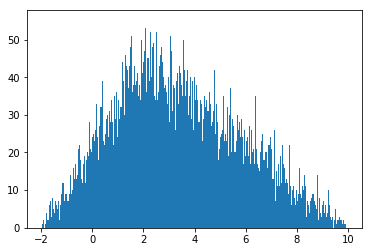

In [11]:
b = plt.hist(np.random.triangular(-2, 2, 10, 10000), bins=450)

### numpy.random.power(a, size=None)
The power function distribution is just the inverse of the Pareto distribution. It may also be seen as a special case of the Beta distribution.

It is used, for example, in modeling the over-reporting of insurance claims.

a is the parameter of the distribution and should be greater than than zero.

In [12]:
a = 5. # shape
samples = 1000
s = np.random.power(a, samples)

#### numpy.diff(a, n=1, axis=-1)
np.diff() caculates the n-th order of discrete difference along a given axis, higher order differences are calculated by using diff() recusively.

#### numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
np.linspace returns evenly spaced numbers between two given values in increments dictated by the value of num

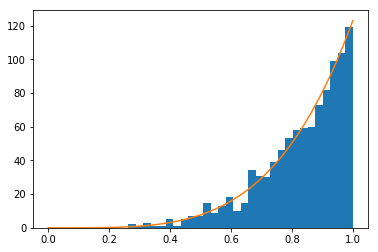

In [13]:
count, bins, ignored = plt.hist(s, bins=30)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

### numpy.random.pareto(a, size=None)
The Pareto distribution must be greater than zero, and is unbounded above. It is also known as the “80-20 rule”. In this distribution, 80 percent of the weights are in the lowest 20 percent of the range, while the other 20 percent fill the remaining 80 percent of the range.

In [14]:
a, m = 3., 2.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m

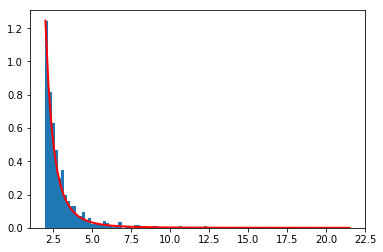

In [15]:
import matplotlib.pyplot as plt
count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

### numpy.random.geometric(p, size=None)
The geometric distribution models the number of trials that must be run in order to achieve success. It is therefore supported on the positive integers, k = 1, 2, ....

The probability mass function of the geometric distribution is

f(k) = (1 - p)^{k - 1} p

where p is the probability of success of an individual trial.

In [16]:
# Adapted From: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.geometric.html#numpy.random.geometric
z = np.random.geometric(p=0.35, size=10000)
(z == 1).sum() / 10000.


0.3481